# Movie

## by Salman Alduraibi

## Preliminary Wrangling

> I choose the Dataset movie for data analysis. This data set contains information about 5K movies collected from The Movie Database (IMDb), including user ratings and score.I would like to find other intresting patterns in the dataset. 

In [7]:
pip install traitlets

Note: you may need to restart the kernel to use updated packages.


In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [9]:
Movies = pd.read_csv("Movies.csv")

In [10]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [11]:
Movies.shape

(7668, 15)

In [12]:
Movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [13]:
Movies.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [14]:
Movies['rating'].value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [15]:
Movies['genre'].value_counts()

Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Romance        10
Sci-Fi         10
Western         3
Musical         2
Sport           1
Music           1
History         1
Name: genre, dtype: int64

In [16]:
Movies['year'].value_counts()

2017    200
2018    200
1990    200
1994    200
1998    200
2002    200
2006    200
2010    200
2014    200
1987    200
2013    200
1991    200
1995    200
1999    200
2003    200
2007    200
2011    200
2015    200
1986    200
2019    200
1992    200
2004    200
2009    200
2005    200
2001    200
1997    200
1993    200
1989    200
1985    200
1988    200
1996    200
2000    200
2016    200
2012    200
2008    200
1984    168
1983    144
1982    126
1981    113
1980     92
2020     25
Name: year, dtype: int64

In [17]:
Movies['company'].value_counts()

Universal Pictures        377
Warner Bros.              334
Columbia Pictures         332
Paramount Pictures        320
Twentieth Century Fox     240
                         ... 
Jensen Farley Pictures      1
Greenleaf Productions       1
Alliance                    1
Lava Bear Films             1
Erato Films                 1
Name: company, Length: 2385, dtype: int64

In [18]:
Movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [19]:
# Remove rows that with NULL value
Movies_clean = Movies.dropna(axis=0, subset=['budget','rating','score','votes','gross','company','runtime'])

> In this database of movies there are a lots of movies where the budget, rating, score, votes, gross, company and runtime have a value 'Null' which means that the values of those variables of those movies has not been recorded. So it will affect my analysis, I have choes to remove all the raw with Null value. 

In [20]:
Movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [21]:
Movies_clean.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [22]:
Movies_clean.shape

(5421, 15)

In [23]:
Movies_clean['rating'].value_counts()

R            2597
PG-13        1729
PG            907
G             111
Not Rated      44
Unrated        17
NC-17          12
TV-MA           2
Approved        1
X               1
Name: rating, dtype: int64

### What is the structure of your dataset?

There are 5421 movies in the dataset. Each movie has the following attributes:

- name: name of the movie
- rating: rating of the movie (R, PG, etc.)
- genre: main genre of the movie.
- year: year of release
- released: release date 
- score: IMDb user rating
- votes: number of user votes
- director: the director
- writer: writer of the movie
- star: main actor/actress
- country: country of origin
- budget: the budget of a movie.
- gross: revenue of the movie
- company: the production company
- runtime: duration of the movie

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in exploring the Movies' budget and gross, along with how these relate to the cinemas,their score, votes, genre, etc, to get a sense of what people are like to watch.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Each Movies budget and gross information will help to understanding what is the income of the movies. The member information like genre, score and votes will help us to find out what the pepole like to watch.

## Univariate Exploration


(array([ 40.,  63.,  71.,  83.,  88.,  95.,  99., 104., 130., 115., 111.,
        113., 131., 140., 128., 138., 144., 149., 148., 162., 162., 164.,
        173., 159., 158., 170., 163., 157., 171., 171., 164., 160., 162.,
        161., 163., 156., 158., 133., 143., 121.]),
 array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
        1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
        1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
        2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
        2016., 2017., 2018., 2019., 2020.]),
 <BarContainer object of 40 artists>)

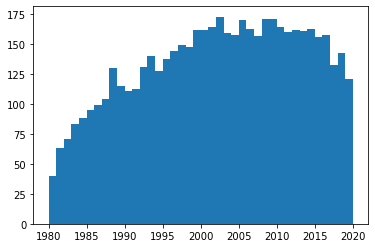

In [24]:
plt.hist(data = Movies_clean, x = 'year', bins = 40)

#### As you can see in the above chart, there are higher number of release movies in 2002.

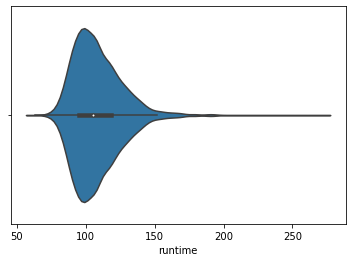

In [25]:
sb.violinplot(data = Movies_clean, x = 'runtime');

#### The highest time of the movies between is 101 Mins

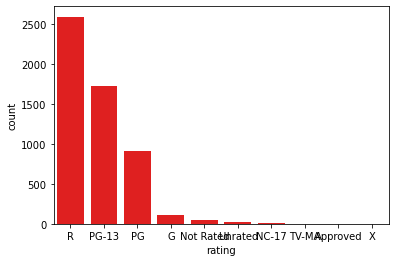

In [26]:
type_order = Movies_clean['rating'].value_counts().index
sb.countplot(data=Movies_clean, x='rating', color='red', order=type_order);

#### The most of the movies are R and PG-13 rated.

<AxesSubplot:title={'center':'The TOP 5 companys for makes movies'}, xlabel='Company Name', ylabel='Movies Count '>

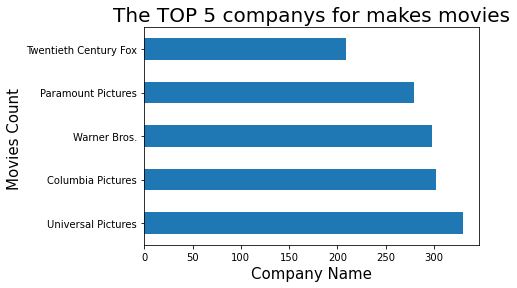

In [27]:
Movies_company = Movies_clean['company'].value_counts()

fig, ax = plt.subplots()

ax.set_xlabel('Company Name', fontsize=15)
ax.set_ylabel('Movies Count ' , fontsize=15)
ax.set_title('The TOP 5 companys for makes movies', fontsize=20)

Movies_company[:5].plot(ax=ax, kind='barh')

#### The TOP company for makeing movies is Universal Pictures

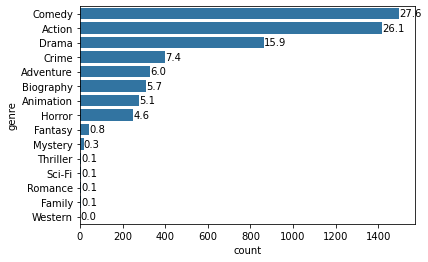

In [28]:
type_counts = Movies_clean['genre'].value_counts()
type_order = type_counts.index
n_Movies = Movies_clean['genre'].value_counts().sum()

# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
base_color = sb.color_palette()[0]
sb.countplot(data=Movies_clean, y='genre', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_Movies)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

#### As we can see in the above chart, Comedy movies are 27.6% which is the highest movies genre.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The movies released between 2017 to 2020 are become less then the previous years so as we know in 2019 we faced COVID-19 which is affecting the movies released.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No, it's clear and doesn't require any modification

## Bivariate Exploration


Text(0, 0.5, 'Movies Gross')

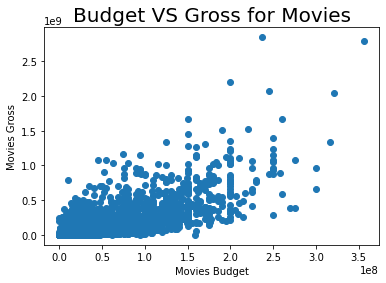

In [29]:
plt.scatter(data = Movies_clean, x = 'budget', y = 'gross');
plt.title('Budget VS Gross for Movies', size=20)
plt.xlabel('Movies Budget')
plt.ylabel('Movies Gross')

#### As the budget raises, there is an exponential tendency for gross improvement

Text(0, 0.5, 'Movie Name')

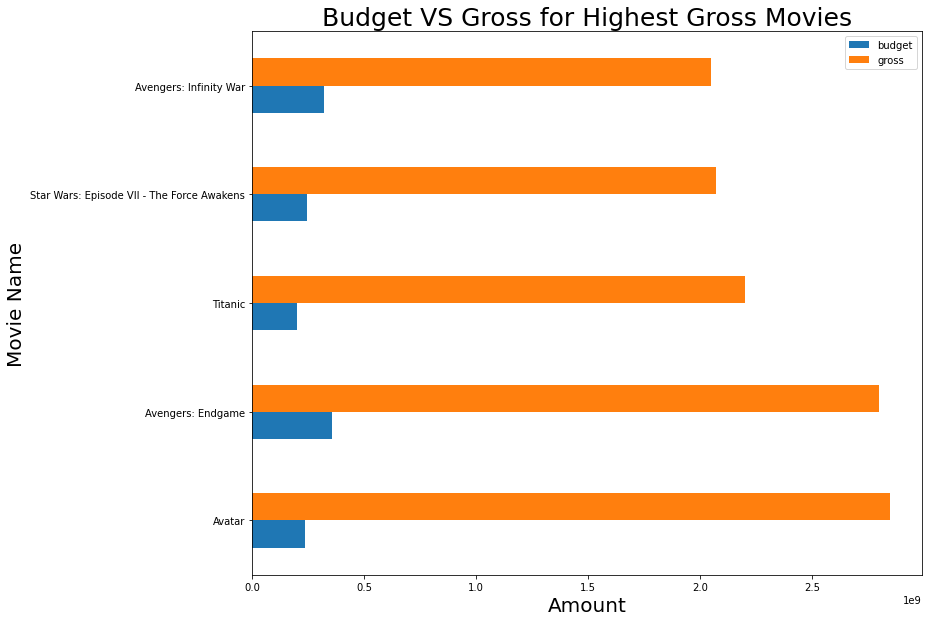

In [30]:
TOP_5_Movies = Movies_clean.sort_values(by=['gross'], inplace=False, ascending=False)
TOP_5_Movies = TOP_5_Movies.head()
TOP_5_Movies.plot(kind='barh', x='name', y=['budget','gross'], figsize=(12,10))
plt.title('Budget VS Gross for Highest Gross Movies', size=25)
plt.xlabel('Amount', size=20)
plt.ylabel('Movie Name', size=20)

#### For the movie AVATAR has the highest gross earn which is 2.847246e+09.

Text(0, 0.5, 'Number Of Movies')

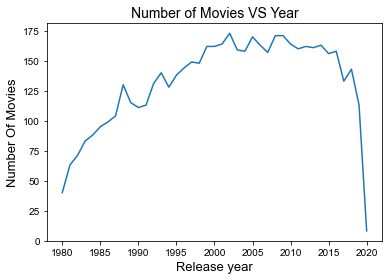

In [31]:
Movies_clean.groupby('year').count()['name'].plot(xticks = np.arange(1980,2025,5))

sb.set(rc={'figure.figsize':(10,5)})
plt.title("Number of Movies VS Year",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)

#### The Highest movie release was in 2002 

In [32]:
star = Movies_clean.groupby(['star'], as_index=False)['name'].count().sort_values(by='name', ascending = False)
TOP_10_star = star.head(10)

writer = Movies_clean.groupby(['writer'], as_index=False)['name'].count().sort_values(by='name', ascending = False)
writer.rename(columns={'name':'Movies'} )
TOP_10_writer = writer.head(10)

director = Movies_clean.groupby(['director'], as_index=False)['name'].count().sort_values(by='name', ascending = False)
writer.rename(columns={'name':'Movies'} )
TOP_10_director = director.head(10)

Text(0, 0.5, 'Writers')

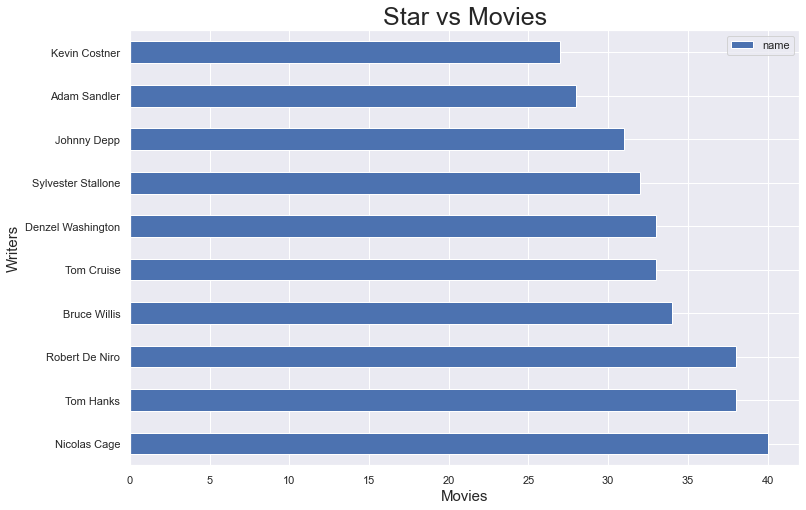

In [33]:
TOP_10_star.plot(kind='barh', x='star', y='name', figsize=(12,8))
plt.title('Star vs Movies', size=25)
plt.xlabel('Movies', size=15)
plt.ylabel('Writers', size=15)

#### As we can see, Nicolas Cage has 40 Movies which is the highest number.

Text(0, 0.5, 'Writers')

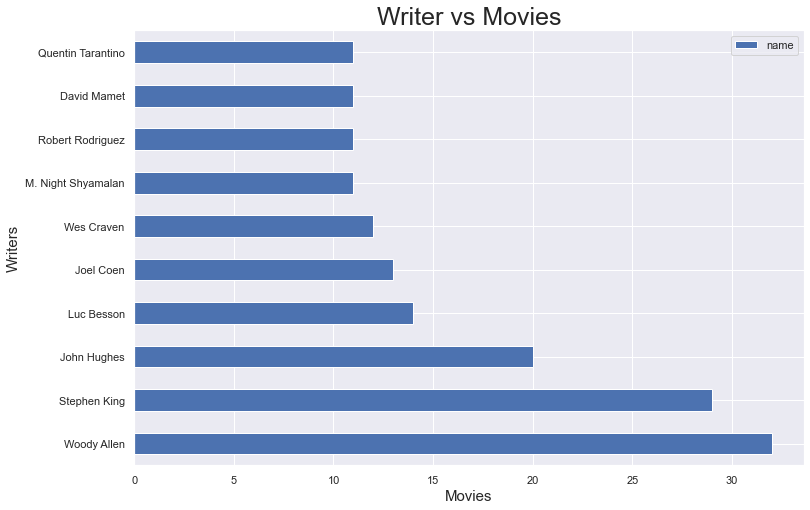

In [34]:
TOP_10_writer.plot(kind='barh', x='writer', y='name', figsize=(12,8))
plt.title('Writer vs Movies', size=25)
plt.xlabel('Movies', size=15)
plt.ylabel('Writers', size=15)

#### As we can see, Woody Allen has 32 Movies which is the highest number

Text(0, 0.5, 'director')

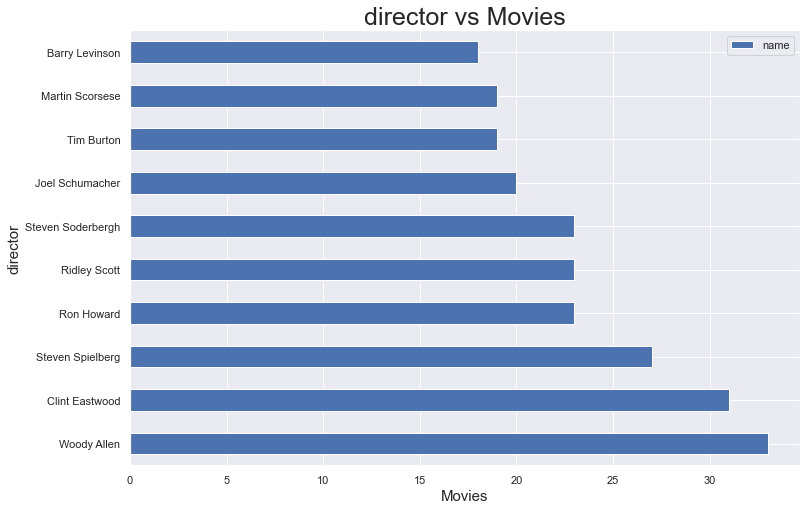

In [35]:
TOP_10_director.plot(kind='barh', x='director', y='name', figsize=(12,8))
plt.title('director vs Movies', size=25)
plt.xlabel('Movies', size=15)
plt.ylabel('director', size=15)

#### As we can see, also Woody Allen has 33 Movies which is the highest number

<AxesSubplot:xlabel='gross', ylabel='genre'>

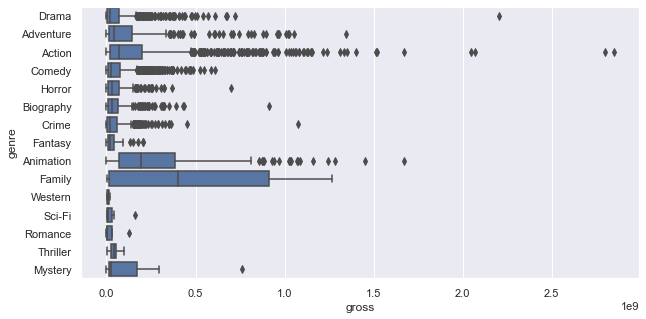

In [36]:
base_color = sb.color_palette()[0]

sb.boxplot(data=Movies_clean, y='genre', x='gross', color = base_color)

#### The highest Gross of Genre movies is Action.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The Gross comparing with the Budget there is a huge difference between them, I didn't expect that !!!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It is interesting to see that Action movies are more earning than other genre of movies. And 2002 has the highest movies throughout the years.

## Multivariate Exploration


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


6.4    264
6.6    261
6.2    254
6.5    243
6.7    229
      ... 
2.8      2
9.0      1
9.3      1
2.6      1
2.3      1
Name: score, Length: 72, dtype: int64

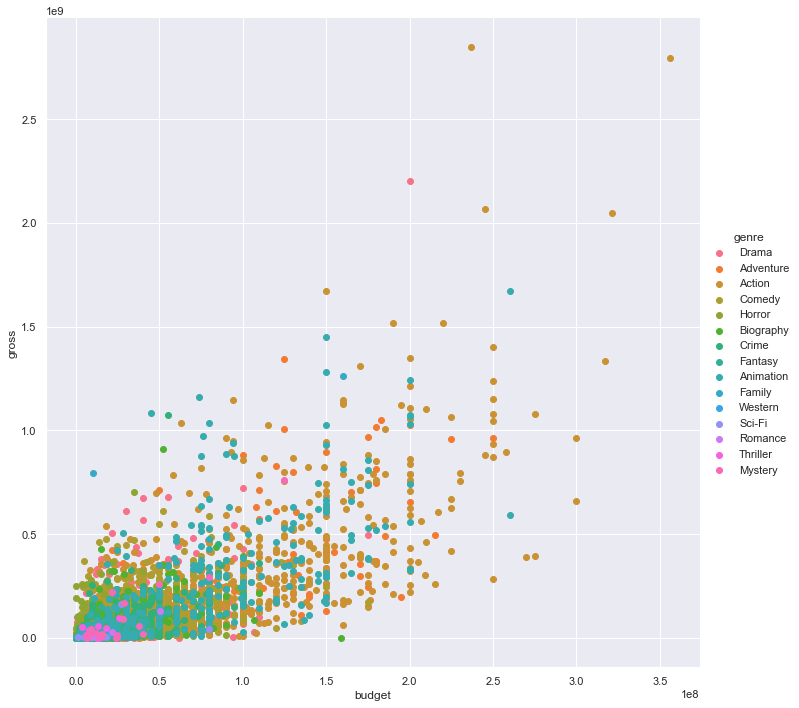

In [37]:
g = sb.FacetGrid(data = Movies_clean, hue = 'genre', size = 10)
g.map(plt.scatter, 'budget', 'gross')
g.add_legend()

Movies_clean['score'].value_counts()

#### we can note that the Action Movies has Highest Budget and Gross.

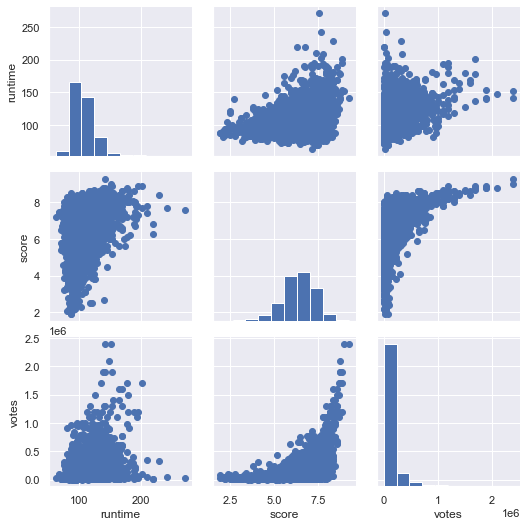

In [38]:
Movies_var = ['runtime', 'score', 'votes']
g = sb.PairGrid(data = Movies_clean, vars = Movies_var)
g = g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)

#### Observation 
- The movies between 120 to 160 Mins has the highest Votes.
- The movies from 100 to 200 has the high score.

<Figure size 841.68x595.44 with 0 Axes>

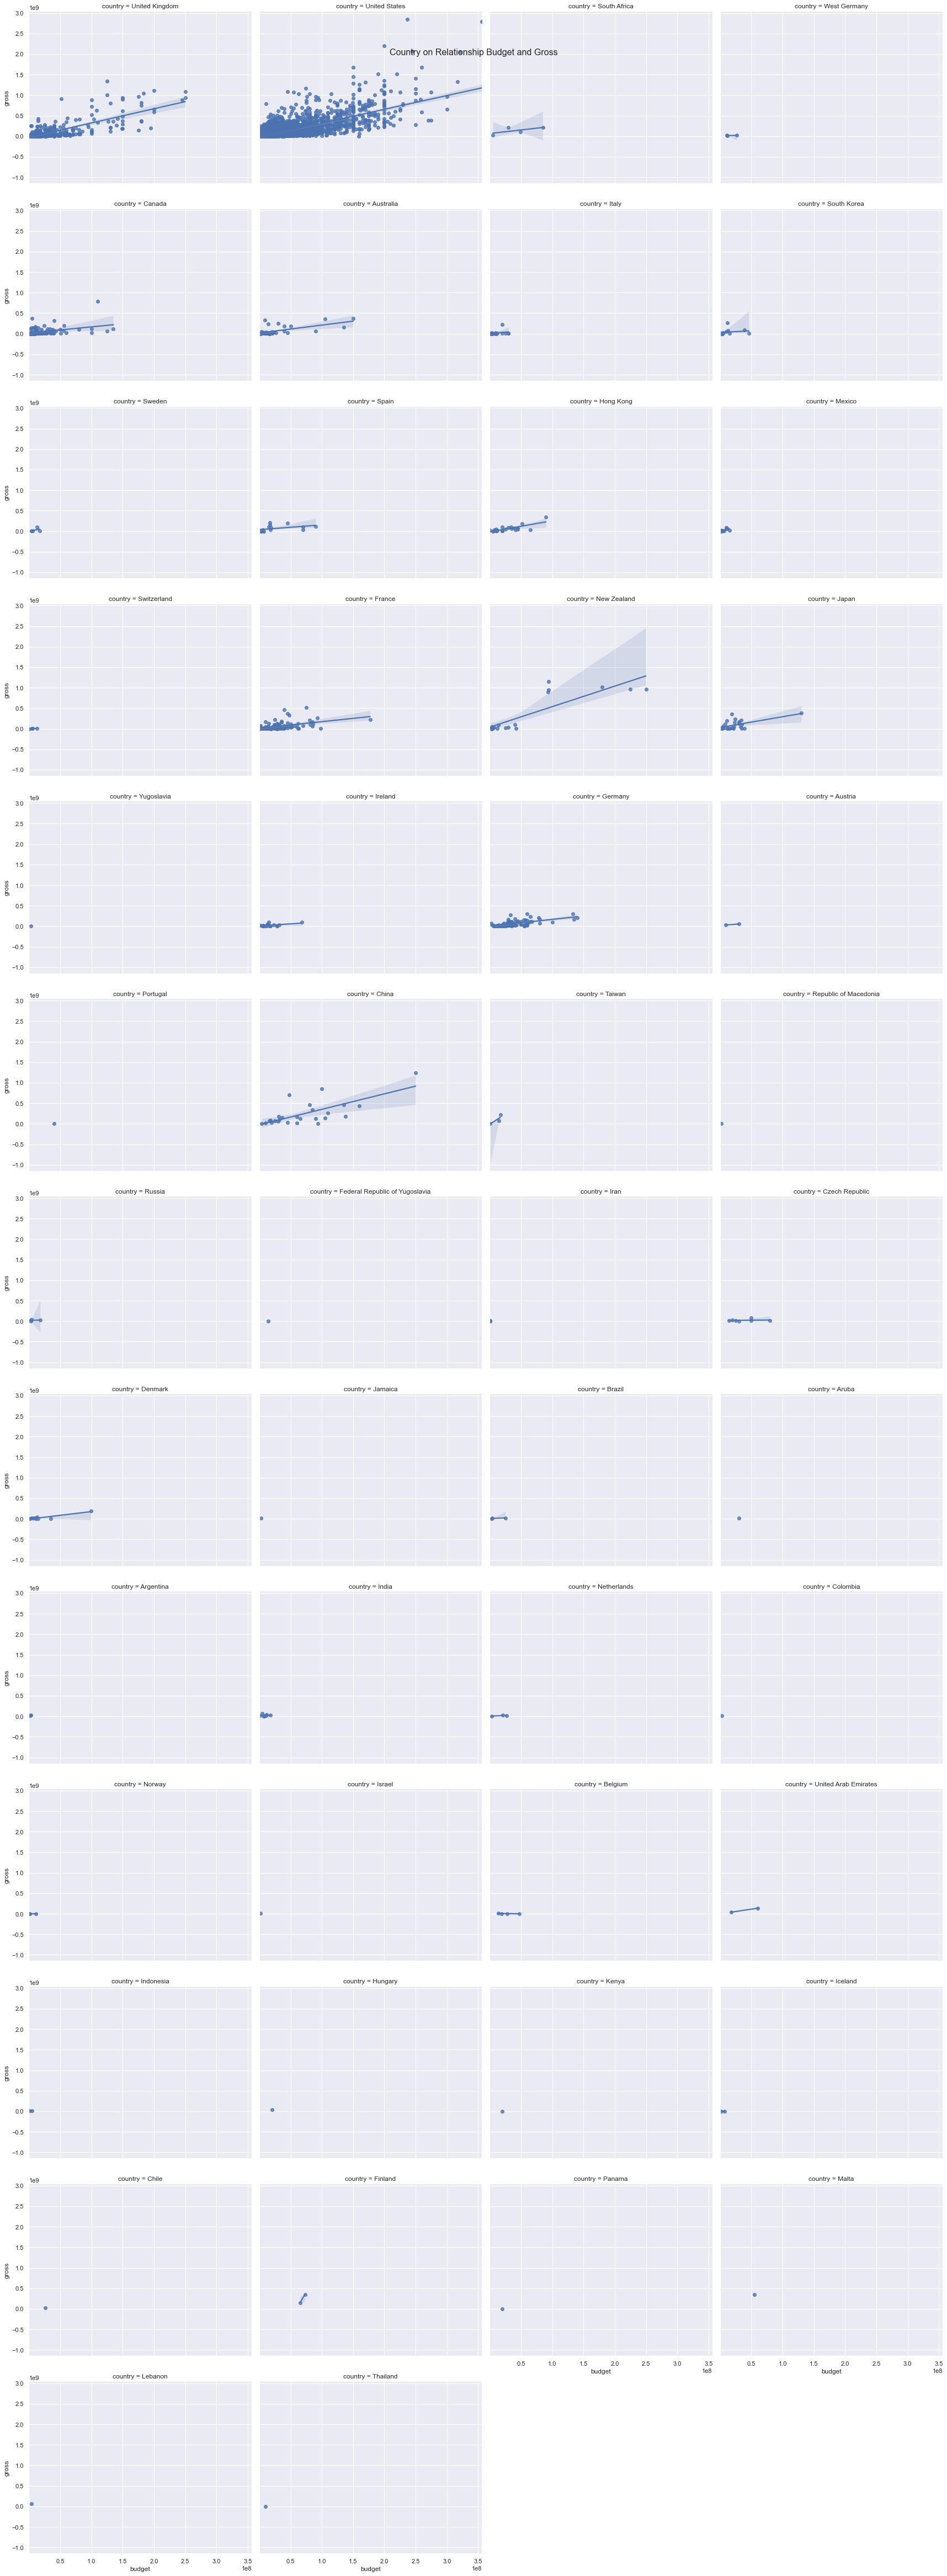

In [39]:
fig = plt.figure(figsize = [11.69, 8.27])
g=sb.FacetGrid(data=Movies_clean, aspect=1.2, height=5, col='country', col_wrap=4)
g.map(sb.regplot, 'budget', 'gross', x_jitter=0.04);
g.fig.suptitle('Country on Relationship Budget and Gross',fontsize=16)
plt.show();
g.add_legend()

#### USA has the highest Gross earning over the countries from 1980 to 2020.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Most of the pepole like Action movie which we can know from the Gross of the movies, and USA has the high number of movies over the years.

### Were there any interesting or surprising interactions between features?

> No there wasn't.